In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


load a dataset

In [2]:
titanic=pd.read_csv('titanic.csv')

### information of the dataset

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [5]:
titanic.shape

(418, 12)

In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [8]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
print(titanic.duplicated().sum())

0


### Handling missing values and Outliers 

In [10]:
titanic.drop(columns=['Cabin'], inplace=True)  

In [11]:
titanic['Embarked'].fillna('S', inplace=True)
print(titanic['Embarked'].value_counts())


Embarked
S    270
C    102
Q     46
Name: count, dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_20164\1642002700.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Embarked'].fillna('S', inplace=True)


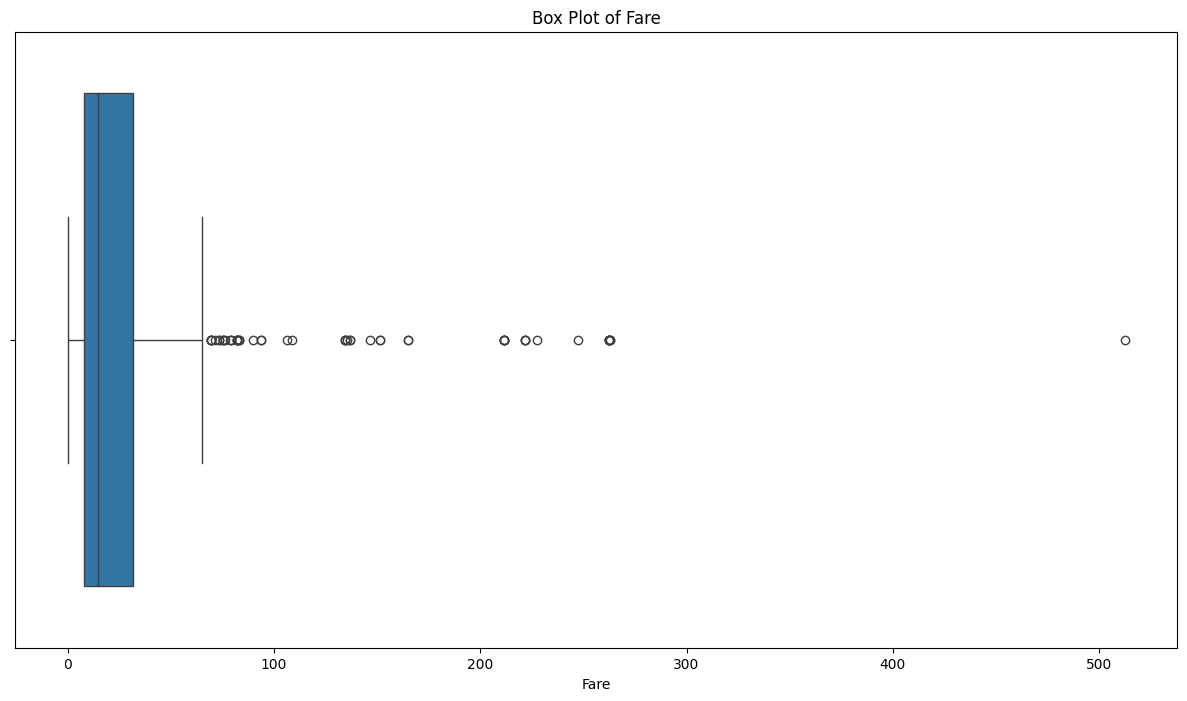

In [12]:
# Box plot for Fare
plt.figure(figsize=(15, 8))
sns.boxplot(x=titanic['Fare'])
plt.title('Box Plot of Fare')
plt.show()

In [13]:
Q1 = titanic['Fare'].quantile(0.25)
Q2 = titanic['Fare'].quantile(0.50)
Q3 = titanic['Fare'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1 = {Q1}")
print(f"Q2 = mean = {Q2}")
print(f"Q3 = {Q3}")
print(f"IQR = {IQR}")

lower_bound= Q1 - 1.5 * IQR
upper_bound= Q3 + 1.5 * IQR
print(f"Lower bound = {lower_bound}")
print(f"Upper bound = {upper_bound}")


# Filter out outliers
outliers_Fare = (titanic['Fare'] <= lower_bound) | (titanic['Fare'] >= upper_bound)
print(outliers_Fare.sum())

Q1 = 7.8958
Q2 = mean = 14.4542
Q3 = 31.5
IQR = 23.6042
Lower bound = -27.5105
Upper bound = 66.9063
55


Error in lowerbound  why this is negative ? 
keep the outlier so what should i do ? 


In [14]:
titanic['Fare_log'] = np.log1p(titanic['Fare'])

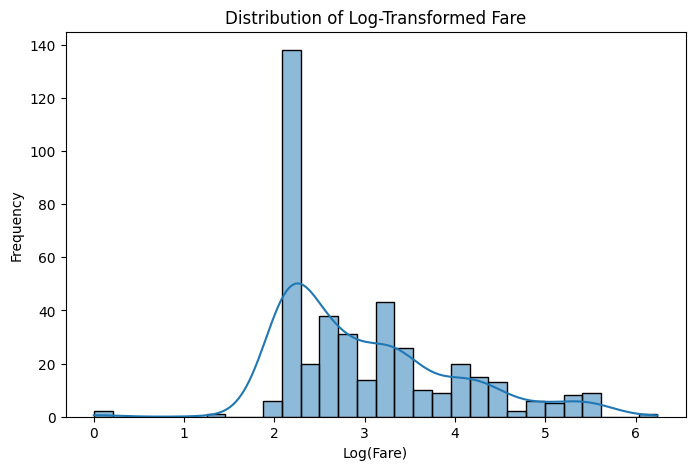

In [15]:
# Plot histogram to see the new distribution
plt.figure(figsize=(8, 5))
sns.histplot(titanic['Fare_log'], bins=30, kde=True)
plt.title("Distribution of Log-Transformed Fare")
plt.xlabel("Log(Fare)")
plt.ylabel("Frequency")
plt.show()


In [16]:
upper_bound_log = np.log1p(66.9063)
print(f"Upper Bound (Log Scale): {upper_bound_log}")
lower_bound_log = np.log1p(2)
print(f"Lower Bound (Log Scale): {lower_bound_log}")



Upper Bound (Log Scale): 4.218128813765682
Lower Bound (Log Scale): 1.0986122886681098


In [17]:
#define new bounds to remove extreme outliers
lower_extreme = 2  # Adjusting to avoid log(0) issues
upper_extreme = 6  # Removing values close to 7

# Filter the dataset
titanic_filtered = titanic[(titanic['Fare_log'] > lower_extreme) & (titanic['Fare_log'] < upper_extreme)]

# Check the number of removed rows
removed_rows = titanic.shape[0] - titanic_filtered.shape[0]
print(f"Number of rows removed: {removed_rows}")


Number of rows removed: 5


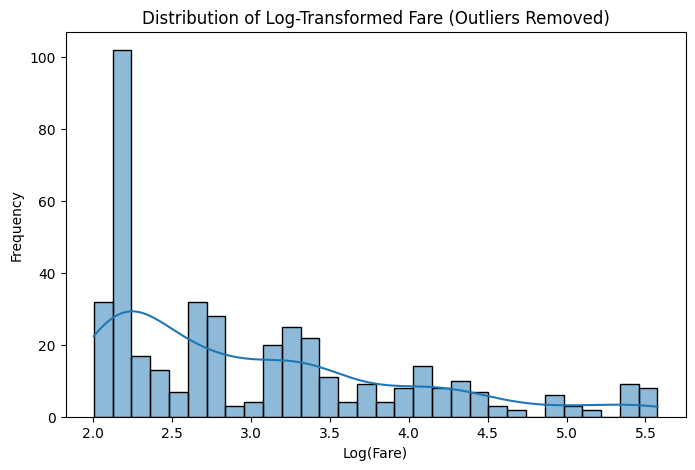

In [18]:
plt.figure(figsize=(8, 5))
sns.histplot(titanic_filtered['Fare_log'], bins=30, kde=True)
plt.title("Distribution of Log-Transformed Fare (Outliers Removed)")
plt.xlabel("Log(Fare)")
plt.ylabel("Frequency")
plt.show()


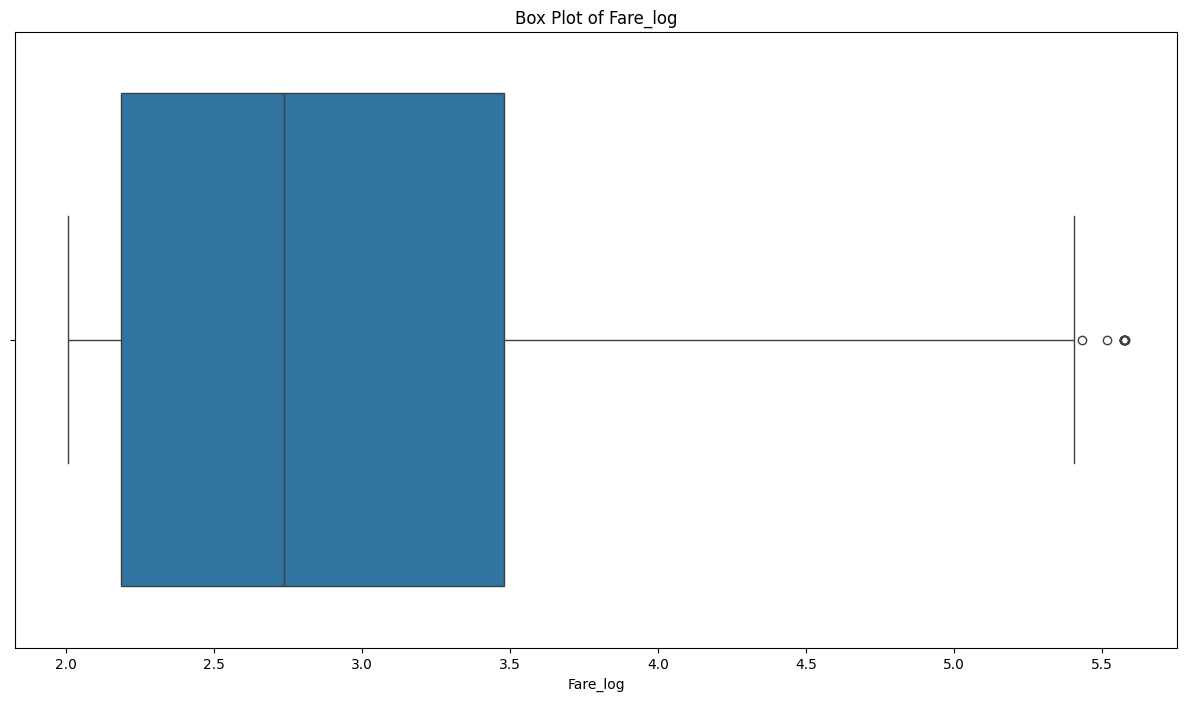

In [19]:
# Box plot for Fare
plt.figure(figsize=(15, 8))
sns.boxplot(x=titanic_filtered['Fare_log'])
plt.title('Box Plot of Fare_log')
plt.show()

In [20]:
titanic_filtered['Fare_bin'] = pd.qcut(titanic_filtered['Fare_log'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_20164\1885838744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_filtered['Fare_bin'] = pd.qcut(titanic_filtered['Fare_log'], 4, labels=['Low', 'Medium', 'High', 'Very High'])


In [21]:
titanic_filtered['Fare'].fillna(titanic_filtered['Fare'].median(), inplace=True)
titanic_filtered['Fare_log'].fillna(titanic_filtered['Fare_log'].median(), inplace=True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_20164\863666918.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_filtered['Fare'].fillna(titanic_filtered['Fare'].median(), inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_20164\863666918.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_filtered['Fare'].fillna(titanic_fi

In [22]:
titanic_filtered.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_log,Fare_bin
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,2.178064,Low
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,2.079442,Low
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,2.369075,Medium
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,2.268252,Medium
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,2.586824,Medium


In [23]:
titanic_filtered.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Fare_log
count,413.000000,413.000000,413.000000,328.000000,413.000000,413.000000,413.000000,413.000000
mean,1100.230024,0.365617,2.271186,30.103659,0.452785,0.392252,34.724062,3.026729
std,120.674451,0.482187,0.838438,13.997729,0.900821,0.985890,50.940182,0.932996
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,6.437500,2.006535
25%,996.000000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800,2.185579
50%,1100.000000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200,2.737881
75%,1204.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000,3.481240
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,263.000000,5.575949


In [24]:
titanic_filtered.isna().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            85
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
Fare_log        0
Fare_bin        0
dtype: int64

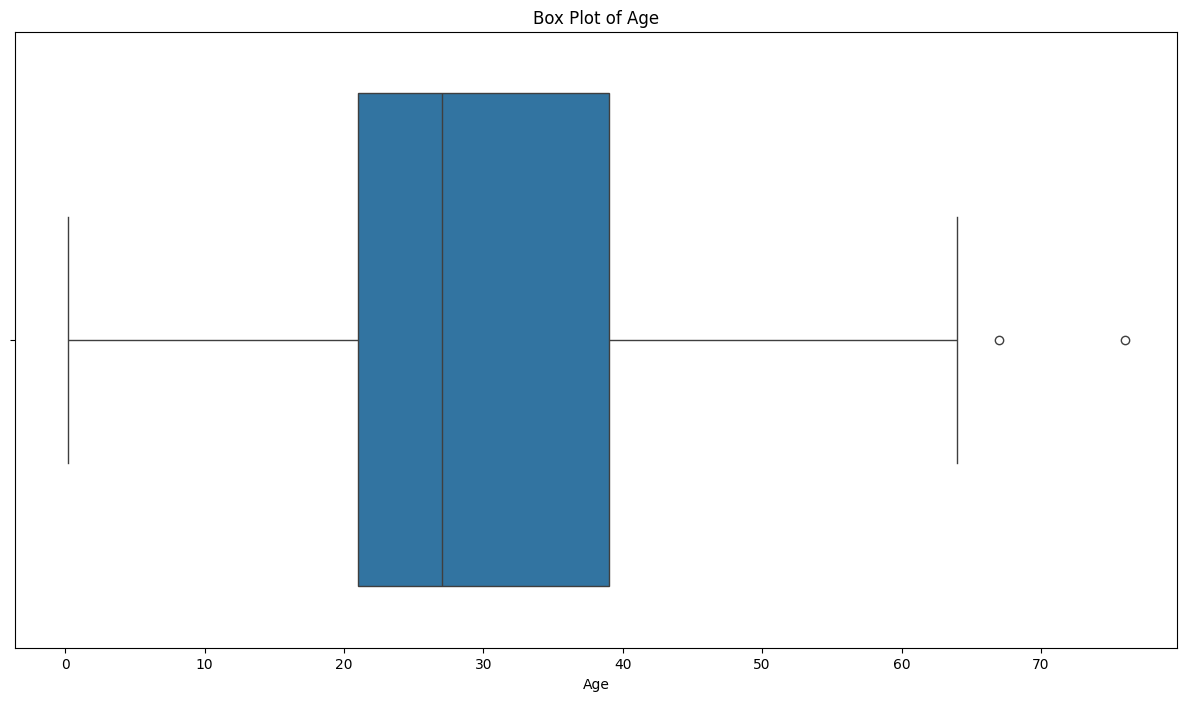

In [25]:
# Box plot for Age

plt.figure(figsize=(15, 8))
sns.boxplot(x=titanic['Age'])
plt.title('Box Plot of Age')
plt.show()

In [26]:
Q1 = titanic['Age'].quantile(0.25)
Q2 = titanic['Age'].quantile(0.50)
Q3 = titanic['Age'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1 = {Q1}")
print(f"Q2 = mean = {Q2}")
print(f"Q3 = {Q3}")
print(f"IQR = {IQR}")

lower_bound= Q1 - 1.5 * IQR
upper_bound= Q3 + 1.5 * IQR
print(f"Lower bound = {lower_bound}")
print(f"Upper bound = {upper_bound}")


# Filter out outliers

outliers_age = (titanic['Age'] <= lower_bound) | (titanic['Age'] >= upper_bound)
print(outliers_age.sum())

Q1 = 21.0
Q2 = mean = 27.0
Q3 = 39.0
IQR = 18.0
Lower bound = -6.0
Upper bound = 66.0
2


In [27]:
titanic_filtered = titanic[(titanic['Age'] <= upper_bound)]  # Remove ages above 66
print(f"Number of removed rows: {titanic.shape[0] - titanic_filtered.shape[0]}")

Number of removed rows: 88


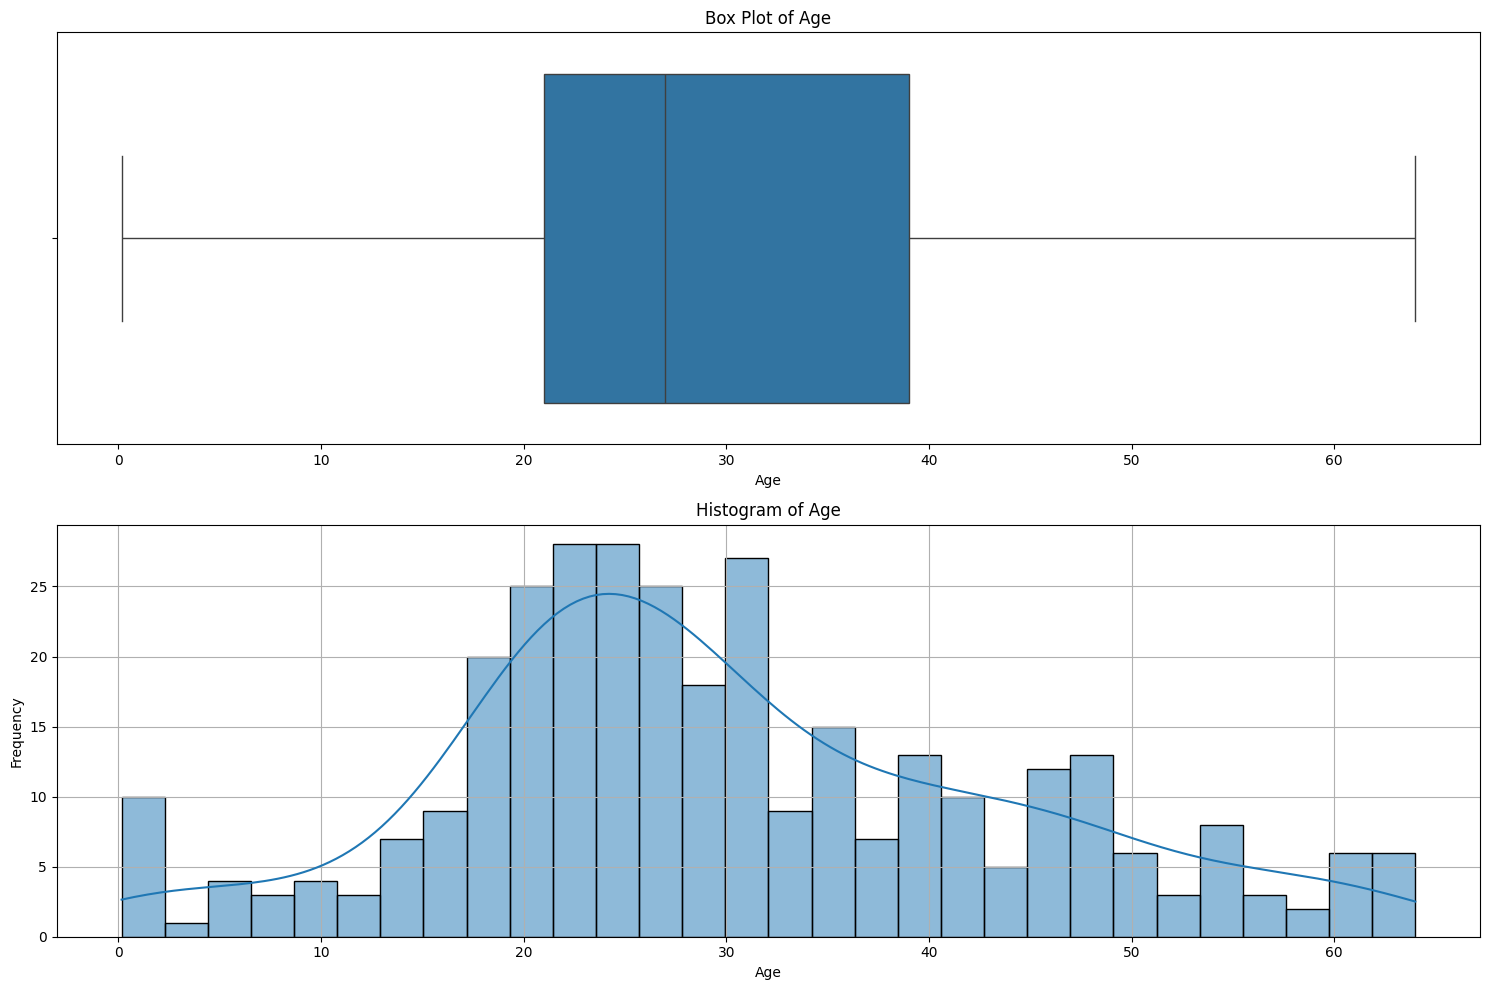

In [28]:
plt.figure(figsize=(15, 10))
#  Box Plot
plt.subplot(2, 1, 1)  
sns.boxplot(x=titanic_filtered['Age'])
plt.title('Box Plot of Age')

# Histogram
plt.subplot(2, 1, 2)
sns.histplot(titanic_filtered['Age'], bins=30, kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.grid(True)
plt.tight_layout()  
plt.show()


In [29]:
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_20164\2184073557.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)


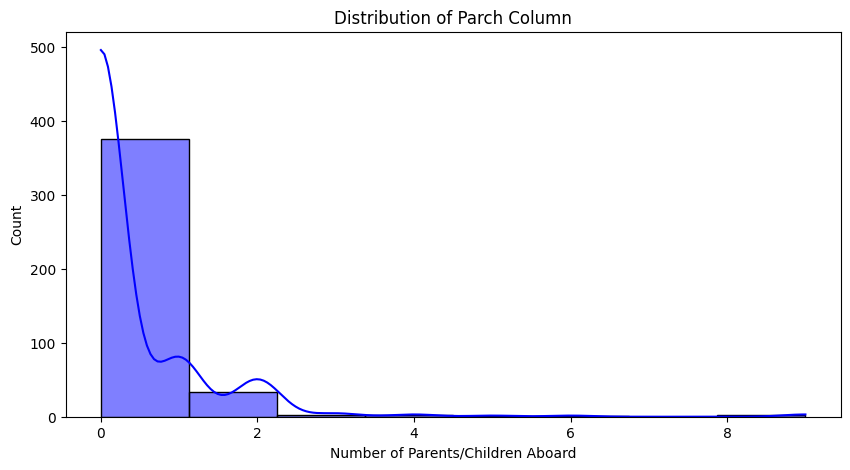

In [30]:
plt.figure(figsize=(10, 5))
sns.histplot(titanic['Parch'], bins=8, kde=True, color='blue')
plt.xlabel("Number of Parents/Children Aboard")
plt.ylabel("Count")
plt.title("Distribution of Parch Column")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_20164\3071172208.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=titanic['Parch'], y=titanic['Survived'], estimator=np.mean, palette='coolwarm')


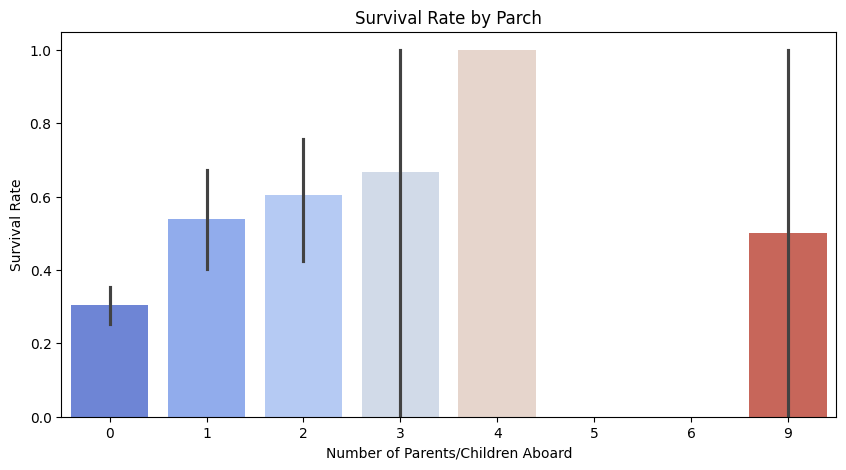

In [31]:
plt.figure(figsize=(10, 5))
sns.barplot(x=titanic['Parch'], y=titanic['Survived'], estimator=np.mean, palette='coolwarm')
plt.xlabel("Number of Parents/Children Aboard")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Parch")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_20164\3574178026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_filtered['Family_Size'] = titanic['Parch'].apply(lambda x: 'Alone' if x == 0 else 'Small Family' if x <= 2 else 'Large Family')
C:\Users\DELL\AppData\Local\Temp\ipykernel_20164\3574178026.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=titanic_filtered['Family_Size'], y=titanic_filtered['Survived'], estimator=np.mean, palette='viridis')


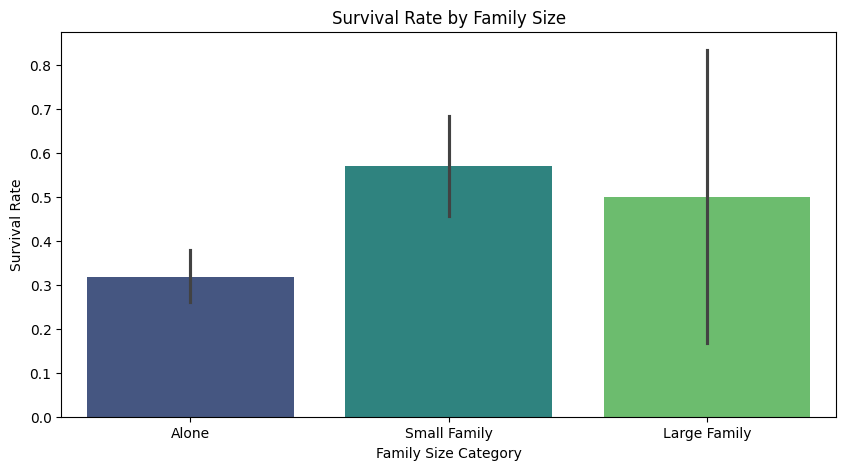

In [32]:
titanic_filtered['Family_Size'] = titanic['Parch'].apply(lambda x: 'Alone' if x == 0 else 'Small Family' if x <= 2 else 'Large Family')

# Visualizing survival based on Family Size
plt.figure(figsize=(10, 5))
sns.barplot(x=titanic_filtered['Family_Size'], y=titanic_filtered['Survived'], estimator=np.mean, palette='viridis')
plt.xlabel("Family Size Category")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Family Size")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_20164\479229293.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=titanic_filtered['Pclass'], palette='pastel')


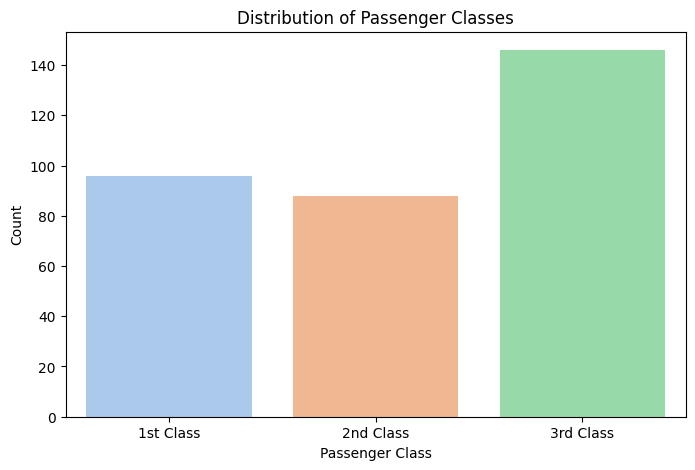

In [33]:
plt.figure(figsize=(8, 5))
sns.countplot(x=titanic_filtered['Pclass'], palette='pastel')
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.title("Distribution of Passenger Classes")
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'])
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_20164\3182419563.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=titanic_filtered['Pclass'], y=titanic_filtered['Survived'], estimator=np.mean, palette='coolwarm')


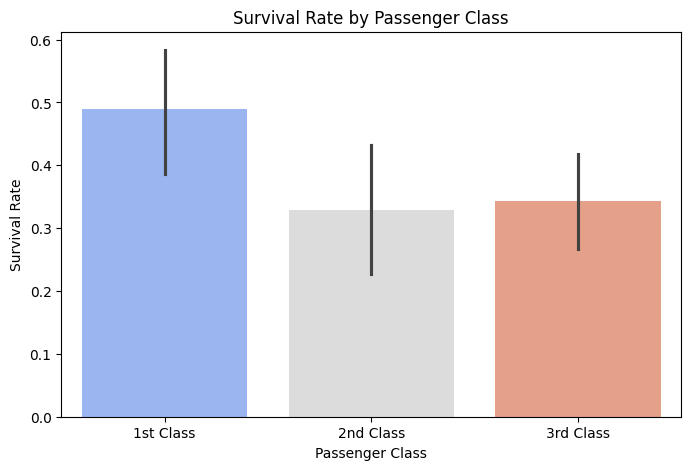

In [34]:
plt.figure(figsize=(8, 5))
sns.barplot(x=titanic_filtered['Pclass'], y=titanic_filtered['Survived'], estimator=np.mean, palette='coolwarm')
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Passenger Class")
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'])
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_20164\3392428787.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=titanic_filtered['Pclass'], y=titanic_filtered['Fare'], palette='viridis')


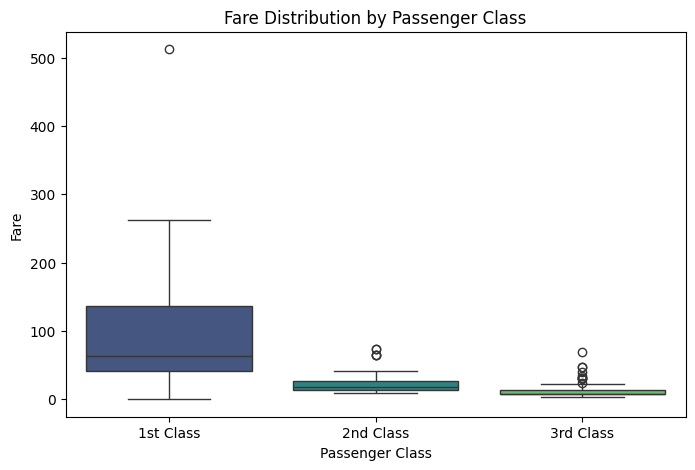

In [35]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=titanic_filtered['Pclass'], y=titanic_filtered['Fare'], palette='viridis')
plt.xlabel("Passenger Class")
plt.ylabel("Fare")
plt.title("Fare Distribution by Passenger Class")
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'])
plt.show()


In [36]:
titanic_filtered['Is_UpperClass'] = titanic_filtered['Pclass'].apply(lambda x: 1 if x == 1 else 0)
titanic_filtered['Is_LowerClass'] = titanic_filtered['Pclass'].apply(lambda x: 1 if x == 3 else 0)
titanic_filtered['Is_MiddleClass'] = titanic_filtered['Pclass'].apply(lambda x: 1 if x == 2 else 0)

C:\Users\DELL\AppData\Local\Temp\ipykernel_20164\53002746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_filtered['Is_UpperClass'] = titanic_filtered['Pclass'].apply(lambda x: 1 if x == 1 else 0)
C:\Users\DELL\AppData\Local\Temp\ipykernel_20164\53002746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_filtered['Is_LowerClass'] = titanic_filtered['Pclass'].apply(lambda x: 1 if x == 3 else 0)
C:\Users\DELL\AppData\Local\Temp\ipykernel_20164\53002746.py:3: SettingWithCopyWarning: 
A val

In [37]:
titanic_filtered.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_log,Family_Size,Is_UpperClass,Is_LowerClass,Is_MiddleClass
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,2.178064,Alone,0,1,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,2.079442,Alone,0,1,0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,2.369075,Alone,0,0,1
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,2.268252,Alone,0,1,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,2.586824,Small Family,0,1,0


In [38]:
titanic_filtered.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Fare_log,Is_UpperClass,Is_LowerClass,Is_MiddleClass
count,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,329.000000,329.000000,330.000000,330.000000,330.000000
mean,1100.787879,0.381818,2.151515,30.022727,0.478788,0.400000,40.317452,3.131031,0.290909,0.442424,0.266667
std,122.778833,0.486570,0.844118,13.849584,0.875800,0.812516,60.558430,0.990030,0.454871,0.497428,0.442888
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,995.250000,0.000000,1.000000,21.000000,0.000000,0.000000,8.050000,2.202765,0.000000,0.000000,0.000000
50%,1100.500000,0.000000,2.000000,27.000000,0.000000,0.000000,15.900000,2.827314,0.000000,0.000000,0.000000
75%,1210.750000,1.000000,3.000000,39.000000,1.000000,1.000000,39.400000,3.698830,1.000000,1.000000,1.000000
max,1307.000000,1.000000,3.000000,64.000000,8.000000,6.000000,512.329200,6.240917,1.000000,1.000000,1.000000


In [39]:
titanic_filtered.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Embarked          0
Fare_log          1
Family_Size       0
Is_UpperClass     0
Is_LowerClass     0
Is_MiddleClass    0
dtype: int64

In [40]:
# Calculate the correlation between features (excluding 'Name' column)
corr_matrix = titanic_filtered.select_dtypes(include=['int64', 'float64']).corr()
print(corr_matrix)

                PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId        1.000000 -0.021027 -0.072949 -0.017518  0.015731 -0.008166   
Survived          -0.021027  1.000000 -0.119079 -0.006438  0.076125  0.166066   
Pclass            -0.072949 -0.119079  1.000000 -0.483604  0.004361 -0.008863   
Age               -0.017518 -0.006438 -0.483604  1.000000 -0.104934 -0.054043   
SibSp              0.015731  0.076125  0.004361 -0.104934  1.000000  0.353669   
Parch             -0.008166  0.166066 -0.008863 -0.054043  0.353669  1.000000   
Fare               0.024726  0.200803 -0.582352  0.321274  0.147622  0.255182   
Fare_log           0.056568  0.218421 -0.769213  0.341682  0.270622  0.311848   
Is_UpperClass      0.020048  0.142076 -0.875091  0.475154  0.023167  0.021382   
Is_LowerClass     -0.105460 -0.072153  0.896742 -0.386156  0.028585  0.004512   
Is_MiddleClass     0.097857 -0.064882 -0.108404 -0.054301 -0.055898 -0.027029   

                    Fare  F

### start  data Visualization

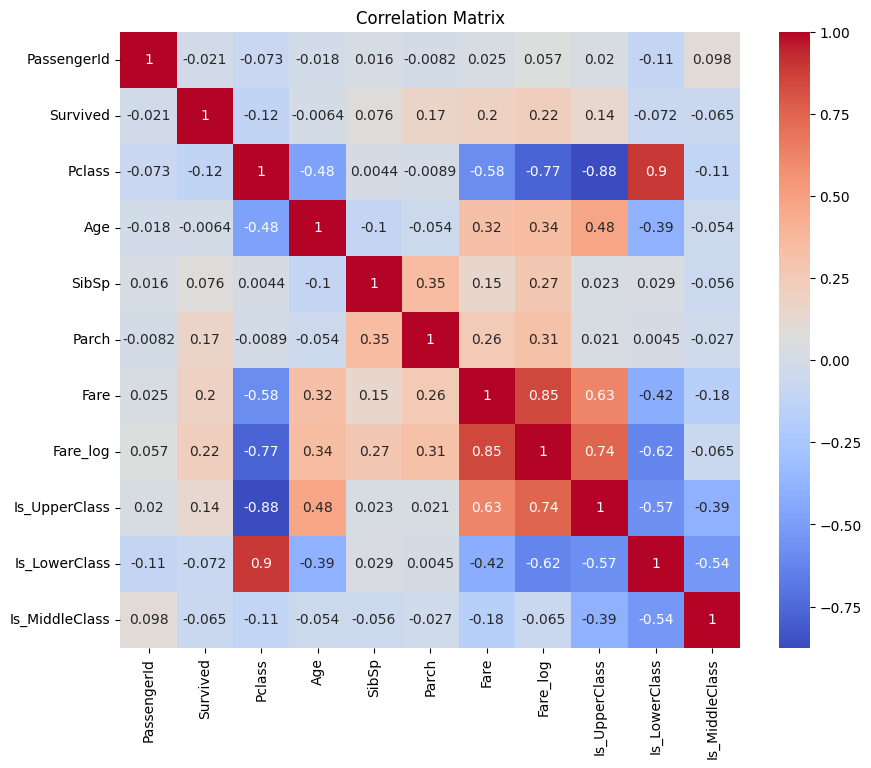

In [41]:
# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

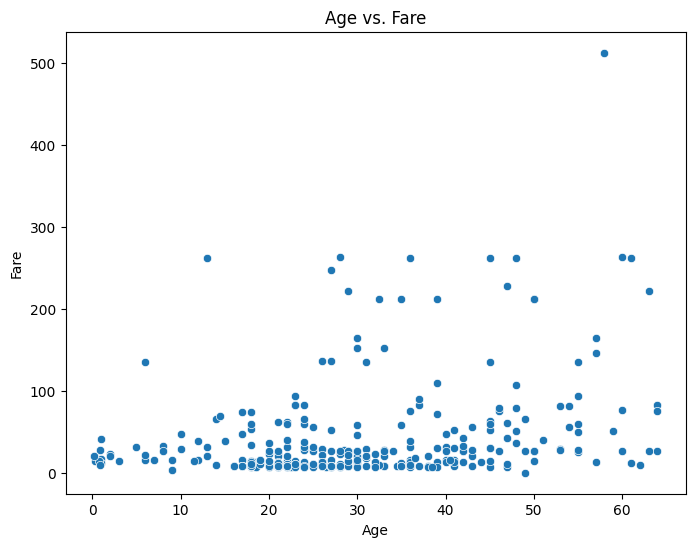

In [42]:
# Scatter plot of Age vs. Fare
plt.figure(figsize=(8, 6))
sns.scatterplot(x=titanic_filtered['Age'], y=titanic_filtered['Fare'])
plt.title('Age vs. Fare')
plt.show()

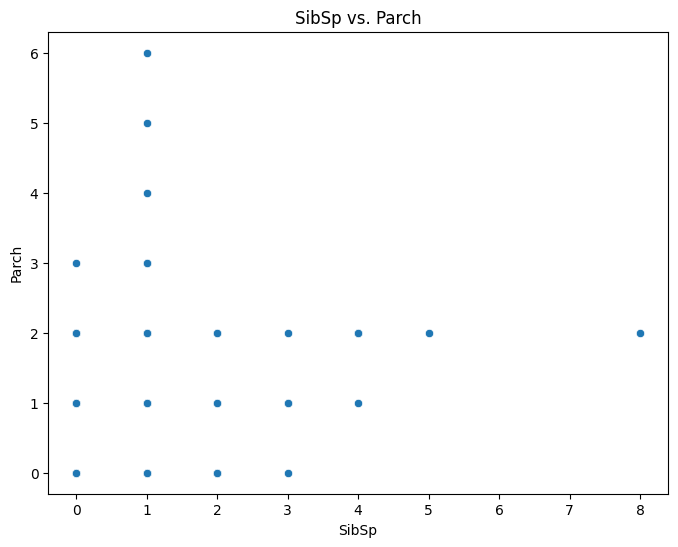

In [43]:
# Scatter plot of SibSp vs. Parch
plt.figure(figsize=(8, 6))
sns.scatterplot(x=titanic_filtered['SibSp'], y=titanic_filtered['Parch'])
plt.title('SibSp vs. Parch')
plt.show()


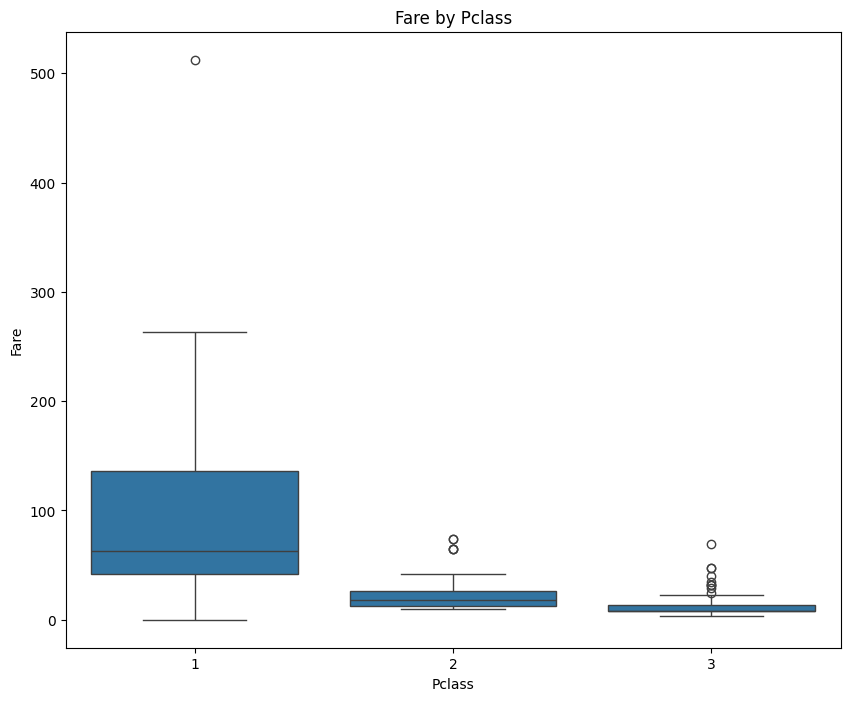

In [44]:
# Box plot of Fare by Pclass
plt.figure(figsize=(10, 8))
sns.boxplot(x=titanic_filtered['Pclass'], y=titanic_filtered['Fare'])
plt.title('Fare by Pclass')
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_20164\2513684611.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rates = titanic_filtered.groupby(age_groups)['Survived'].mean()


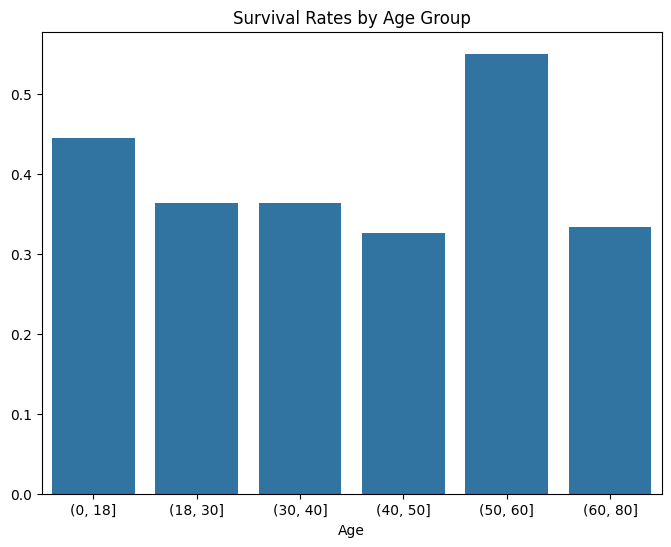

In [45]:
# Bar plot of Survival Rates by Age Group
age_groups = pd.cut(titanic_filtered['Age'], bins=[0, 18, 30, 40, 50, 60, 80])
survival_rates = titanic_filtered.groupby(age_groups)['Survived'].mean()
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_rates.index, y=survival_rates.values)
plt.title('Survival Rates by Age Group')
plt.show()

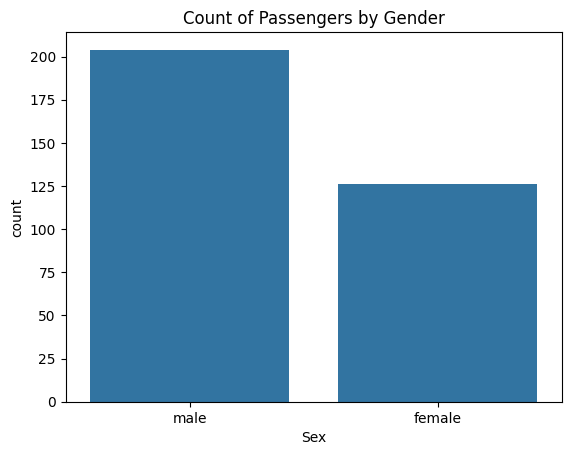

In [46]:
sns.countplot(x='Sex', data=titanic_filtered)
plt.title('Count of Passengers by Gender')
plt.show()

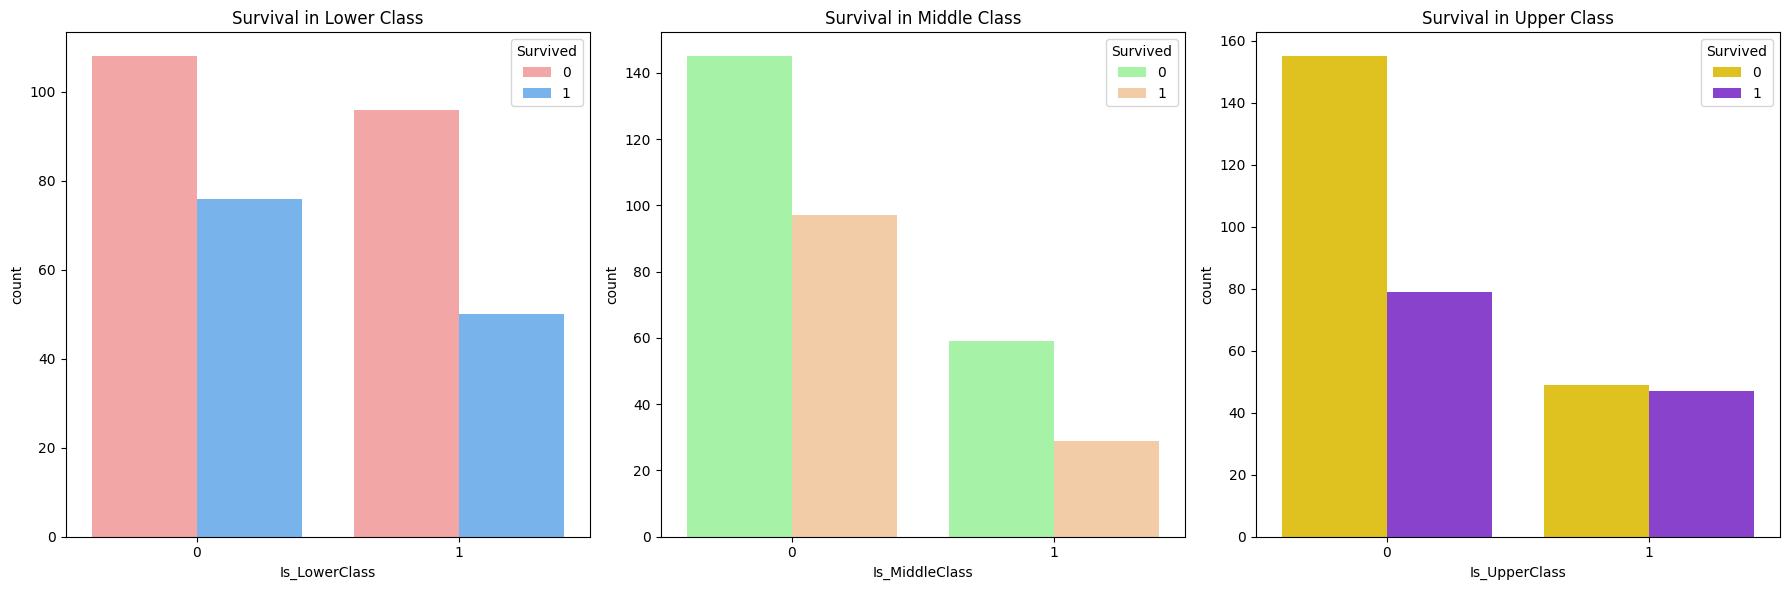

In [47]:
plt.figure(figsize=(18, 6))
colors_lower = ['#FF9999', '#66B3FF']  # Red & Blue
colors_middle = ['#99FF99', '#FFCC99']  # Green & Orange
colors_upper = ['#FFD700', '#8A2BE2']  # Gold & Purple

# Plot 1: Lower Class Survival
plt.subplot(1, 3, 1)
sns.countplot(x=titanic_filtered['Is_LowerClass'], hue=titanic_filtered['Survived'], palette=colors_lower)
plt.title('Survival in Lower Class')

# Plot 2: Middle Class Survival
plt.subplot(1, 3, 2)
sns.countplot(x=titanic_filtered['Is_MiddleClass'], hue=titanic_filtered['Survived'], palette=colors_middle)
plt.title('Survival in Middle Class')

# Plot 3: Upper Class Survival
plt.subplot(1, 3, 3)
sns.countplot(x=titanic_filtered['Is_UpperClass'], hue=titanic_filtered['Survived'], palette=colors_upper)
plt.title('Survival in Upper Class')

# Show the plots
plt.tight_layout()
plt.show()


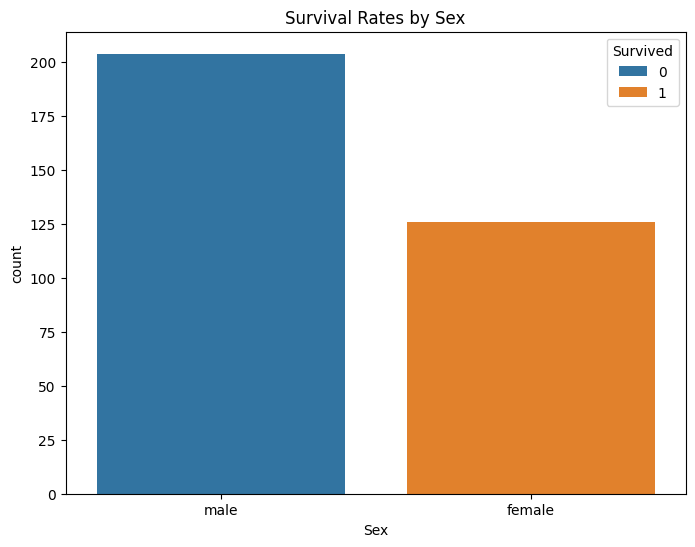

In [48]:
# Bar plot of survival rates by sex
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=titanic_filtered)
plt.title('Survival Rates by Sex')
plt.show()

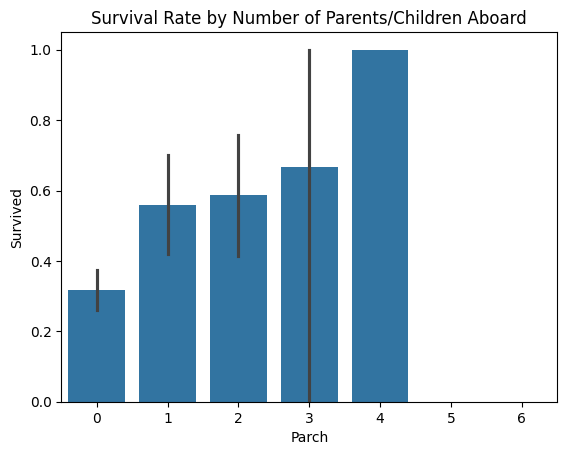

In [49]:
sns.barplot(x='Parch', y='Survived', data=titanic_filtered)
plt.title('Survival Rate by Number of Parents/Children Aboard')
plt.show()

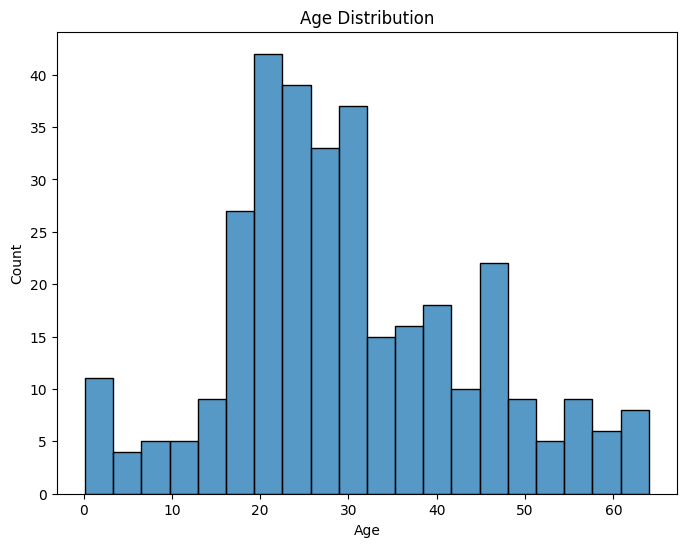

In [50]:
# Histogram of ages
plt.figure(figsize=(8, 6))
sns.histplot(titanic_filtered['Age'], bins=20)
plt.title('Age Distribution')
plt.show()

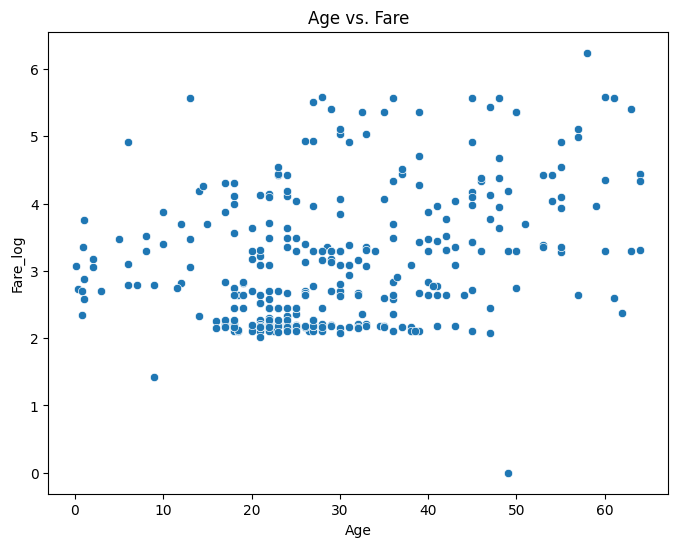

In [51]:
# Scatter plot of age vs. fare
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Fare_log', data=titanic_filtered)
plt.title('Age vs. Fare')
plt.show()

In [52]:
# Calculate the survival rate by embarkation point
embarkation_points = titanic_filtered['Embarked'].unique()
survival_rates_embark = titanic_filtered.groupby('Embarked')['Survived'].mean()
print(survival_rates_embark)

Embarked
C    0.451220
Q    0.545455
S    0.340708
Name: Survived, dtype: float64


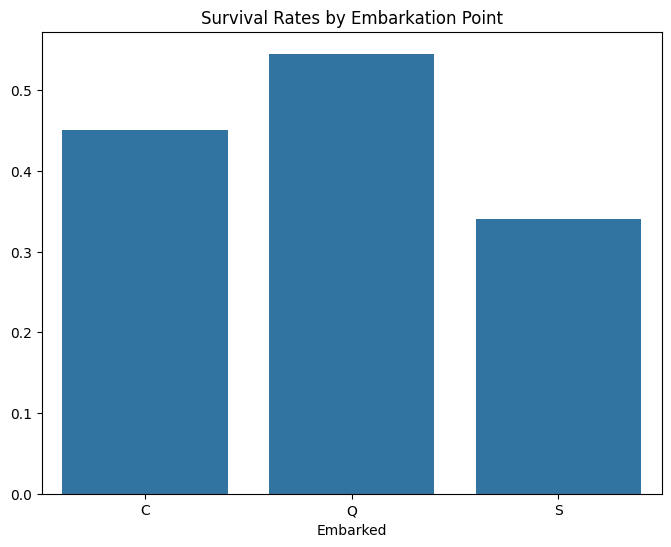

In [53]:

# Bar plot of survival rates by embarkation point
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_rates_embark.index, y=survival_rates_embark.values)
plt.title('Survival Rates by Embarkation Point')
plt.show()

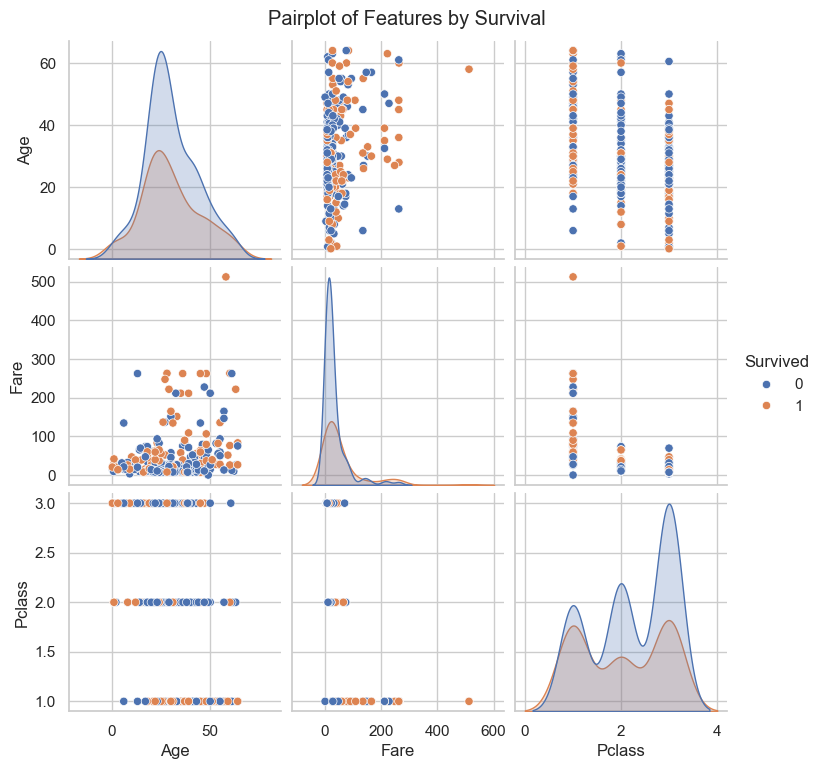

In [54]:
# Create a pairplot with enhanced aesthetics
sns.set(style="whitegrid")
pairplot = sns.pairplot(titanic_filtered, hue='Survived',vars=['Age', 'Fare', 'Pclass'])
plt.suptitle('Pairplot of Features by Survival', y=1.02)  
plt.show()

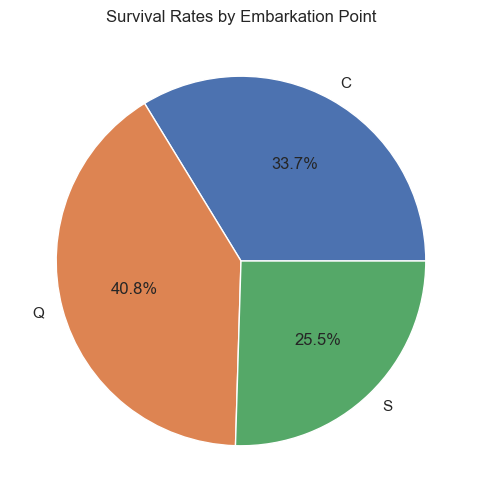

In [55]:
#pie chart to survive rates by embarkation point
plt.figure(figsize=(8, 6))
plt.pie(survival_rates_embark.values, labels=survival_rates_embark.index, autopct='%1.1f%%')
plt.title('Survival Rates by Embarkation Point')
plt.show()

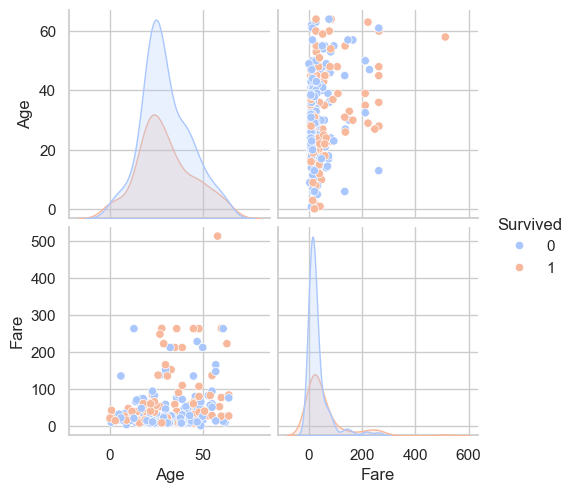

In [56]:
# Example with Age, Fare, and Survived
sns.pairplot(titanic_filtered, vars=['Age', 'Fare'], hue='Survived', palette='coolwarm')
plt.show()

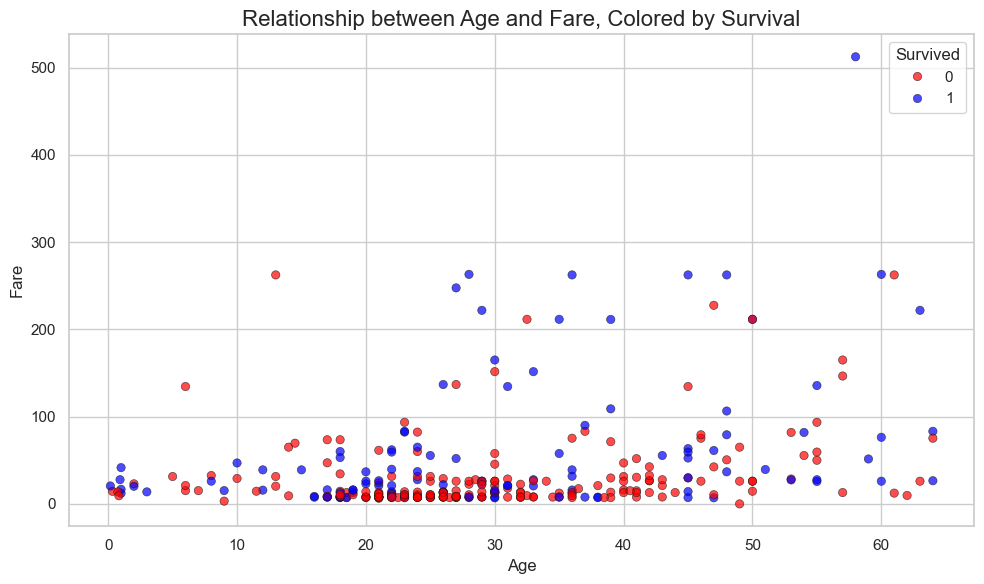

In [57]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=titanic_filtered,
    x="Age",
    y="Fare",
    hue="Survived",
    palette={0: "red", 1: "blue"},
    alpha=0.7,
    edgecolor="k"
)
# Customize the plot
plt.title("Relationship between Age and Fare, Colored by Survival", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Fare", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_20164\1914527176.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


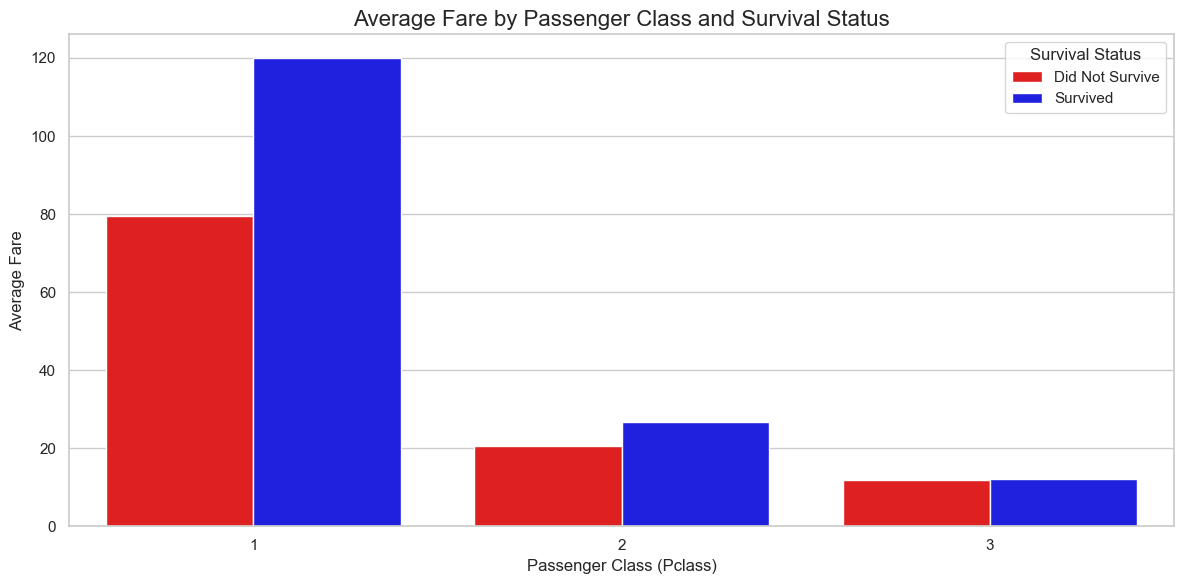

In [58]:

plt.figure(figsize=(12, 6))
sns.barplot(
    data=titanic_filtered,
    x="Pclass",  # X-axis: Passenger class
    y="Fare",    # Y-axis: Average fare
    hue="Survived",  # Hue: Survival status (0 = Did Not Survive, 1 = Survived)
    palette={0: "red", 1: "blue"},
    ci=None  # Disable confidence intervals for cleaner bars
)
# Customize the plot
plt.title("Average Fare by Passenger Class and Survival Status", fontsize=16)
plt.xlabel("Passenger Class (Pclass)", fontsize=12)
plt.ylabel("Average Fare", fontsize=12)
plt.legend(title="Survival Status", labels=["Did Not Survive", "Survived"])
plt.tight_layout()
plt.show()



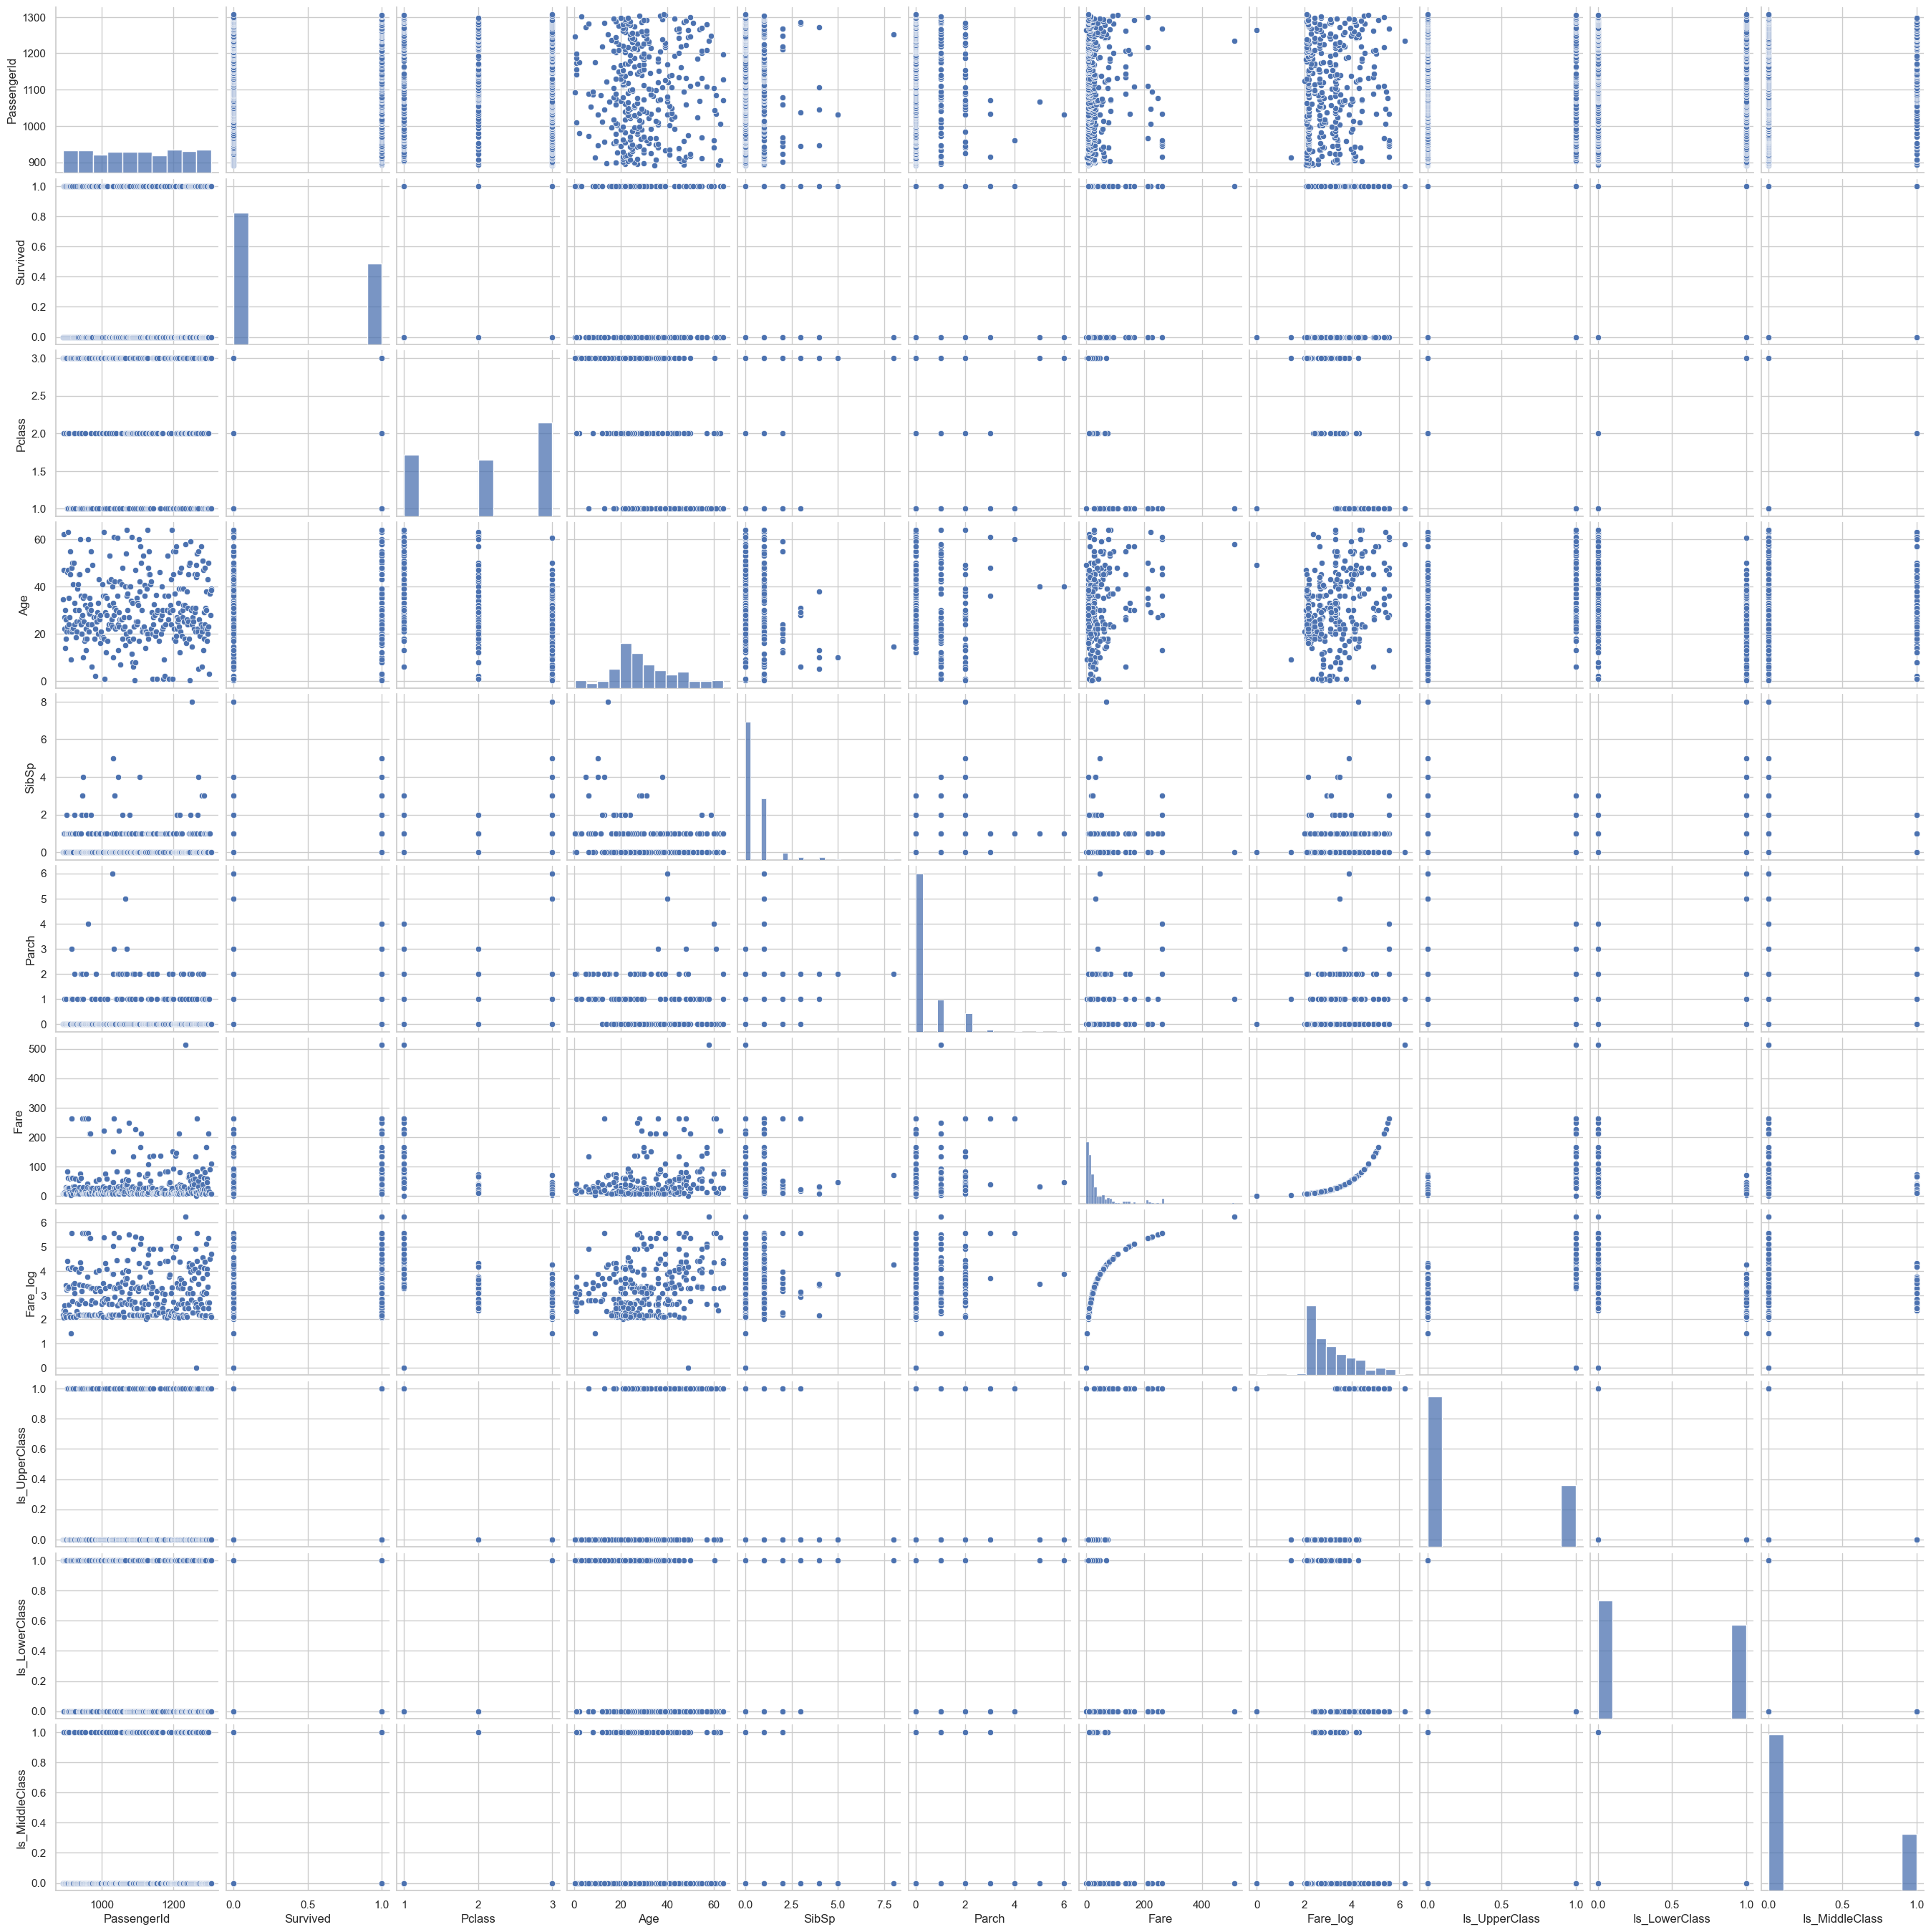

In [59]:
sns.pairplot(titanic_filtered, height=2.5, diag_kind="hist")

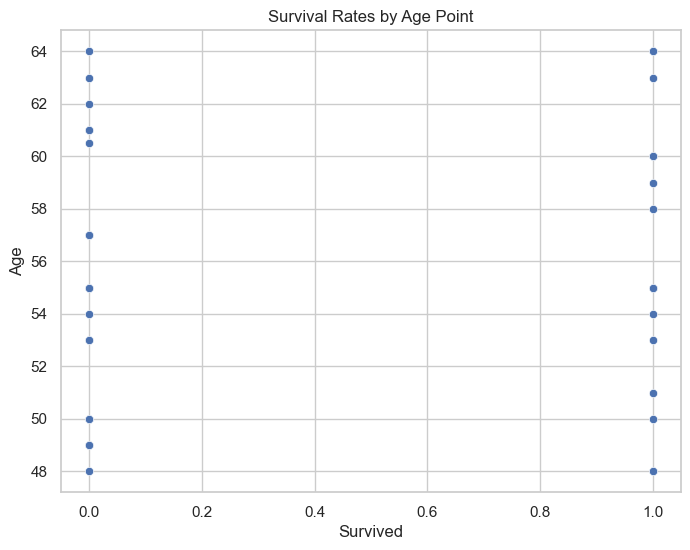

In [60]:
top_Aged = titanic_filtered.sort_values(by='Age', ascending=False).head(40)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Survived', y='Age', data=top_Aged)
plt.title('Survival Rates by Age Point')
plt.show()

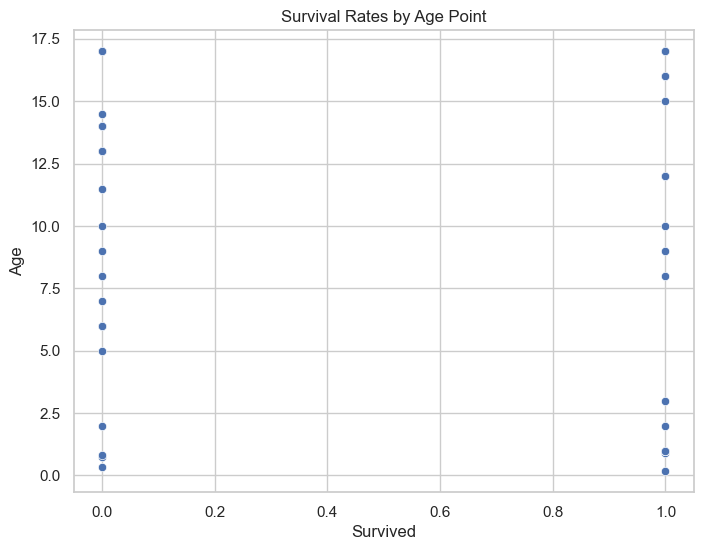

In [61]:
min_Aged = titanic_filtered.sort_values(by='Age', ascending=True).head(40)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Survived', y='Age', data=min_Aged)
plt.title('Survival Rates by Age Point')
plt.show()





In [62]:
titanic_filtered.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_log,Family_Size,Is_UpperClass,Is_LowerClass,Is_MiddleClass
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,2.178064,Alone,0,1,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,2.079442,Alone,0,1,0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,2.369075,Alone,0,0,1
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,2.268252,Alone,0,1,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,2.586824,Small Family,0,1,0


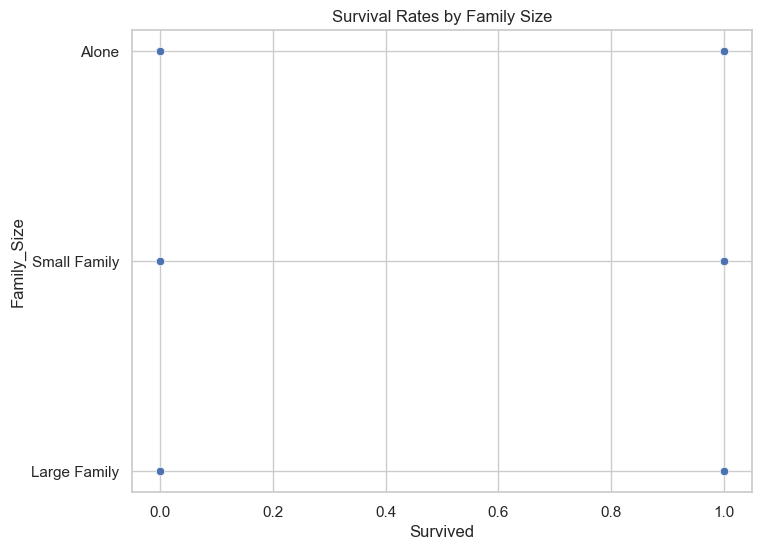

In [63]:
# Create a new column 'Family Size' by adding 'SibSp' and 'Parch'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Survived', y='Family_Size', data=titanic_filtered)
plt.title('Survival Rates by Family Size')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_20164\714870578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_filtered['Alone'] = (titanic_filtered['Family_Size'] == 'Alone').astype(int)


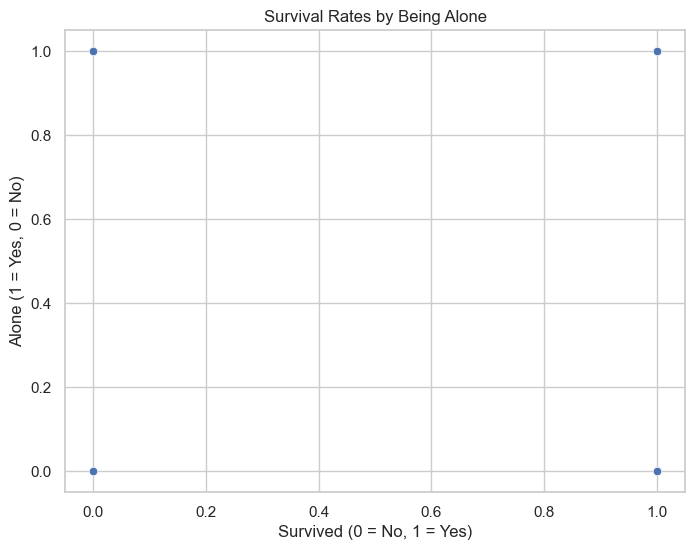

In [64]:
titanic_filtered['Alone'] = (titanic_filtered['Family_Size'] == 'Alone').astype(int)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Survived', y='Alone', data=titanic_filtered)
plt.title('Survival Rates by Being Alone')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Alone (1 = Yes, 0 = No)')
plt.show()


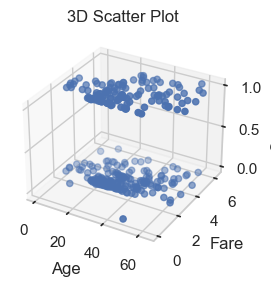

In [65]:
fig = plt.figure()

# 3D Scatter Plot
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(titanic_filtered['Age'], titanic_filtered['Fare_log'], titanic_filtered['Survived'])
ax1.set_xlabel('Age')
ax1.set_ylabel('Fare')
ax1.set_zlabel('Survived')
ax1.set_title('3D Scatter Plot')


plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_20164\207065465.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_filtered['AgeGroup'] = pd.cut(
C:\Users\DELL\AppData\Local\Temp\ipykernel_20164\207065465.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)


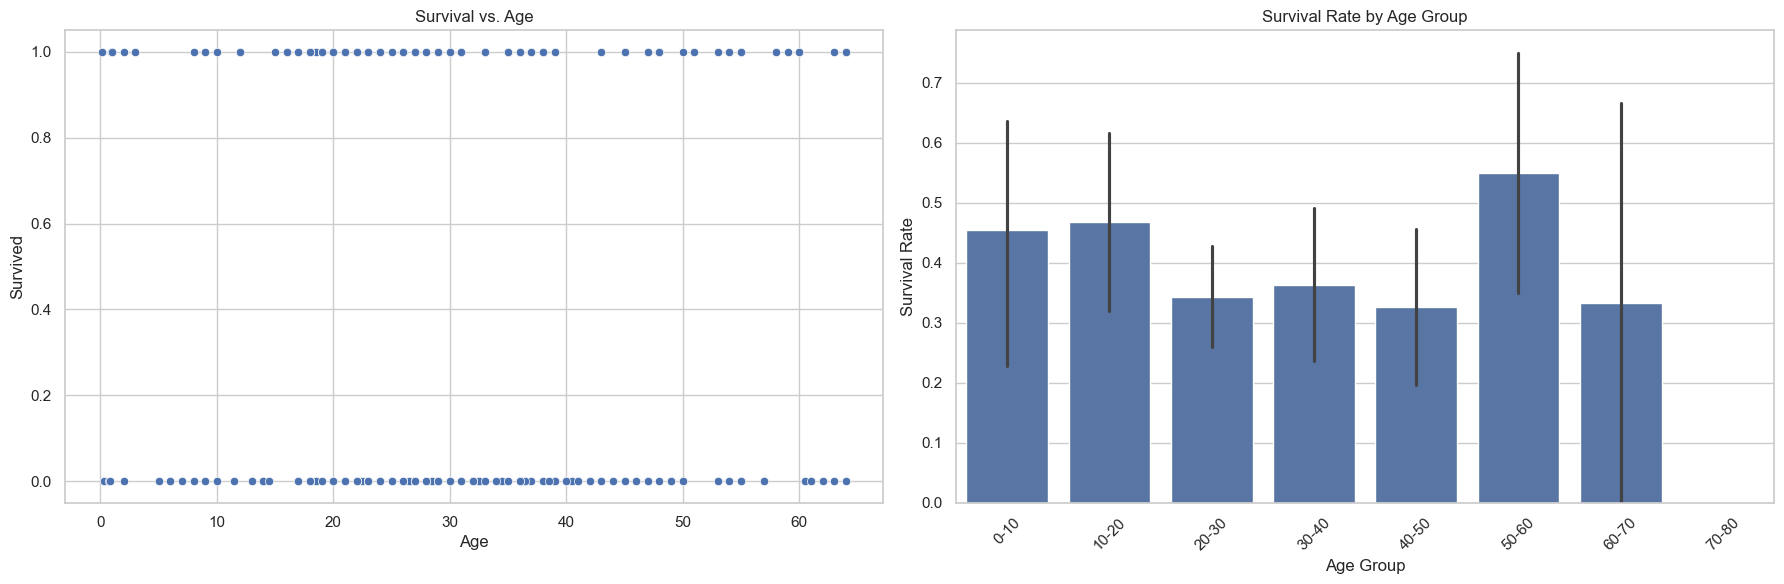

In [66]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Scatter Plot: Age vs Survival
sns.scatterplot(x='Age', y='Survived', data=titanic_filtered, ax=axes[0])
axes[0].set_title('Survival vs. Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Survived')

# Ensure 'AgeGroup' is created in the same dataframe used for plotting
titanic_filtered['AgeGroup'] = pd.cut(
    titanic_filtered['Age'], 
    bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], 
    labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
)

# Bar Plot: Survival Rate by Age Group
sns.barplot(x='AgeGroup', y='Survived', data=titanic_filtered, ax=axes[1])
axes[1].set_title('Survival Rate by Age Group')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Survival Rate')

# Rotate x-axis labels for better readability
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


In [68]:
titanic_filtered.to_csv('titanic_filtered.csv', index=False)
